Выполнить предсказание временного ряда. 
Разделить нужно не смешивая прошлое и будущее. 
Использовать sarima /  Prophet?
LSTM
docker / собрать контейнер с tf + добавить свои данные
Electric_Production

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'],header=0)
print(dataset)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

dataset.plot(x='DATE',y='IPG2211A2N')
plt.ylabel('Electricity production')

          DATE  IPG2211A2N
0   1985-01-01     72.5052
1   1985-02-01     70.6720
2   1985-03-01     62.4502
3   1985-04-01     57.4714
4   1985-05-01     55.3151
..         ...         ...
392 2017-09-01     98.6154
393 2017-10-01     93.6137
394 2017-11-01     97.3359
395 2017-12-01    114.7212
396 2018-01-01    129.4048

[397 rows x 2 columns]


Text(0, 0.5, 'Electricity production')

Разделим данные на сезонность, тренд и остатки при помощи sm.tsa.seasonal_decompose:

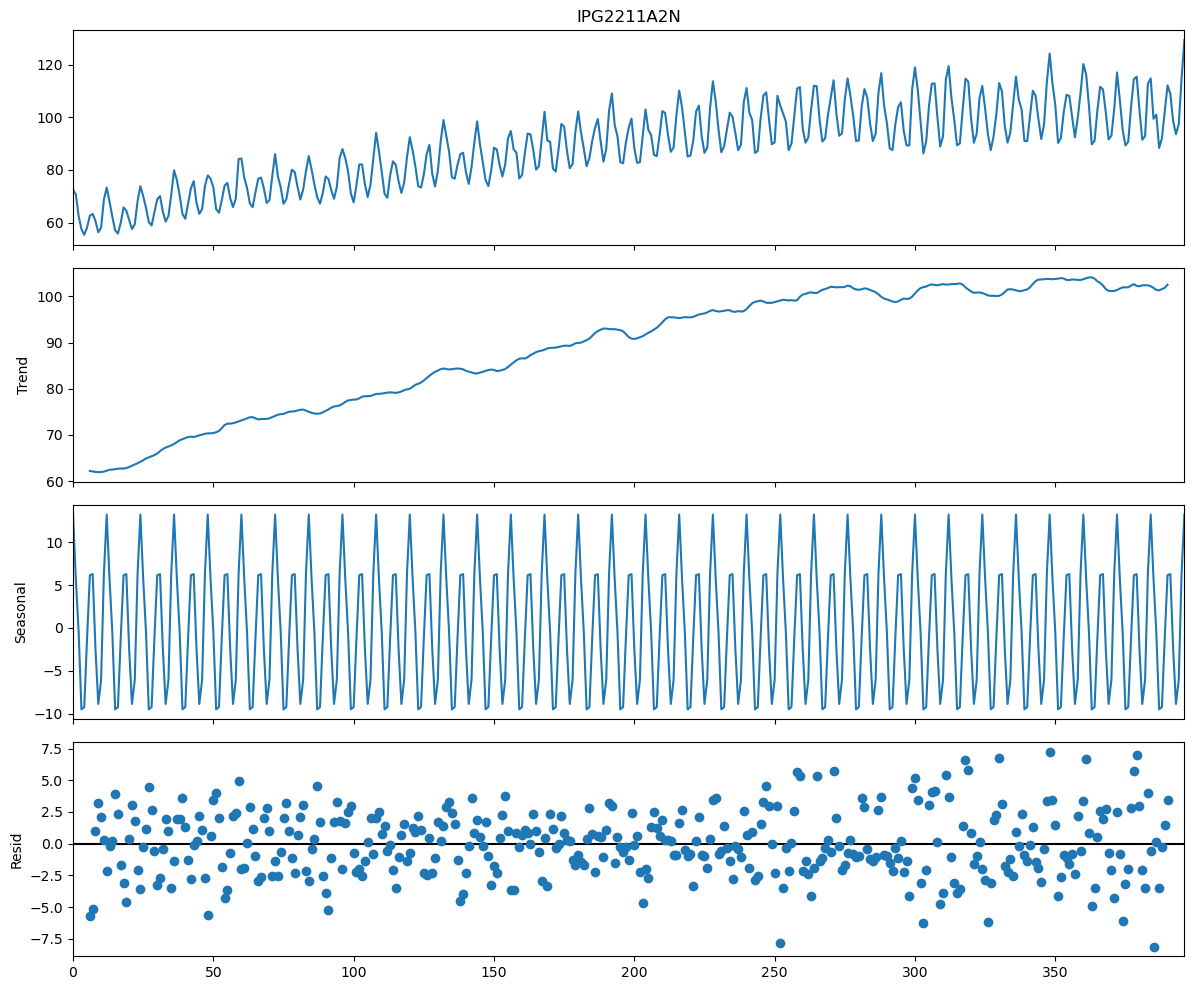

In [ ]:
#!pip install statsmodels
sm.tsa.seasonal_decompose(dataset['IPG2211A2N'],period = 12).plot()


Разбили данные на сезонность, тренд и остаток.

In [ ]:

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])


Критерий Стьюдента: p=0.854483
Критерий Дики-Фуллера: p=0.000000


Согласно проверки ДикиФуллера, ряд является стационарным.

Построим функцию автокорреляции и функцию частичной автокорреляции

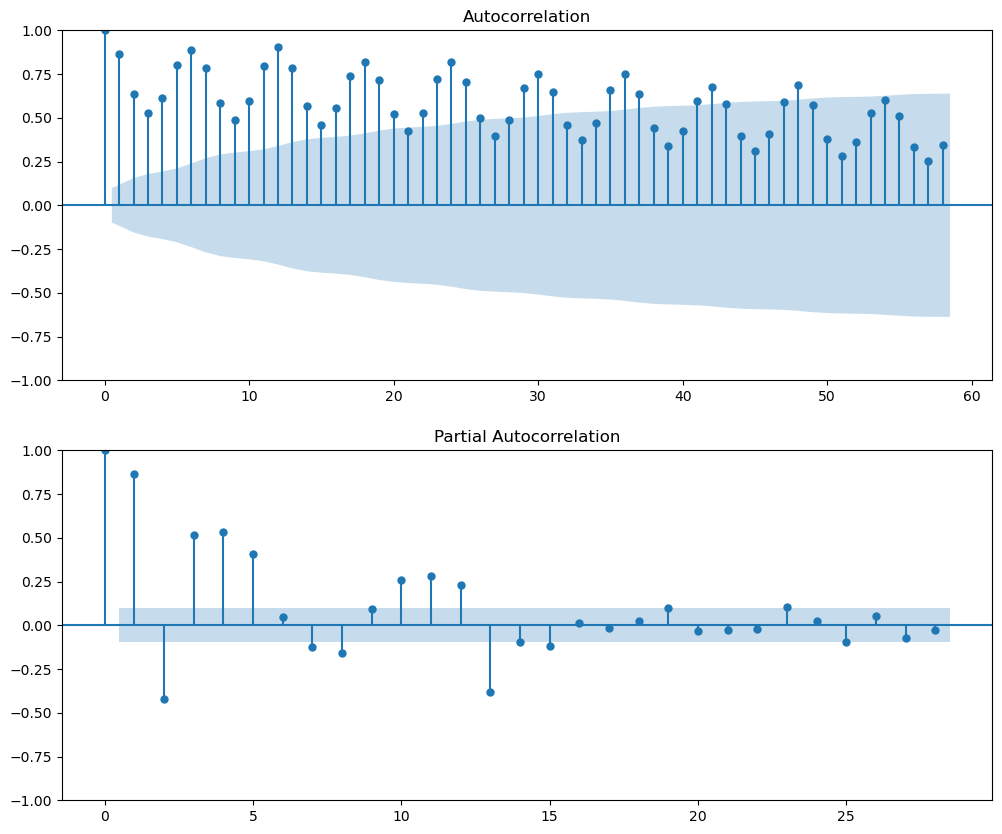

In [49]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(dataset['IPG2211A2N'].values.squeeze(), lags=58, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(dataset['IPG2211A2N'].values.squeeze(), lags=28, ax=ax); #58
plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split
model = pm.auto_arima(dataset['IPG2211A2N'].to_numpy().reshape(-1), seasonal=True, m=12)


d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=7>
  return process_handler(cmd, _system_body)
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)


Построим прогноз по функции авто-арима:

[ 72.5052  70.672   62.4502  57.4714  55.3151  58.0904  62.6202  63.2485
  60.5846  56.3154  58.0005  68.7145  73.3057  67.9869  62.2221  57.0329
  55.8137  59.9005  65.7655  64.4816  61.0005  57.5322  59.3417  68.1354
  73.8152  70.062   65.61    60.1586  58.8734  63.8918  68.8694  70.0669
  64.1151  60.3789  62.4643  70.5777  79.8703  76.1622  70.2928  63.2384
  61.4065  67.1097  72.9816  75.7655  67.5152  63.2832  65.1078  73.8631
  77.9188  76.6822  73.3523  65.1081  63.6892  68.4722  74.0301  75.0448
  69.3053  65.8735  69.0706  84.1949  84.3598  77.1726  73.1964  67.2781
  65.8218  71.4654  76.614   77.1052  73.061   67.4365  68.5665  77.6839
  86.0214  77.5573  73.365   67.15    68.8162  74.8448  80.0928  79.1606
  73.5743  68.7538  72.5166  79.4894  85.2855  80.1643  74.5275  69.6441
  67.1784  71.2078  77.5081  76.5374  72.3541  69.0286  73.4992  84.5159
  87.9464  84.5561  79.4747  71.0578  67.6762  74.3297  82.1048  82.0605
  74.6031  69.681   74.4292  84.2284  94.1386  87.1

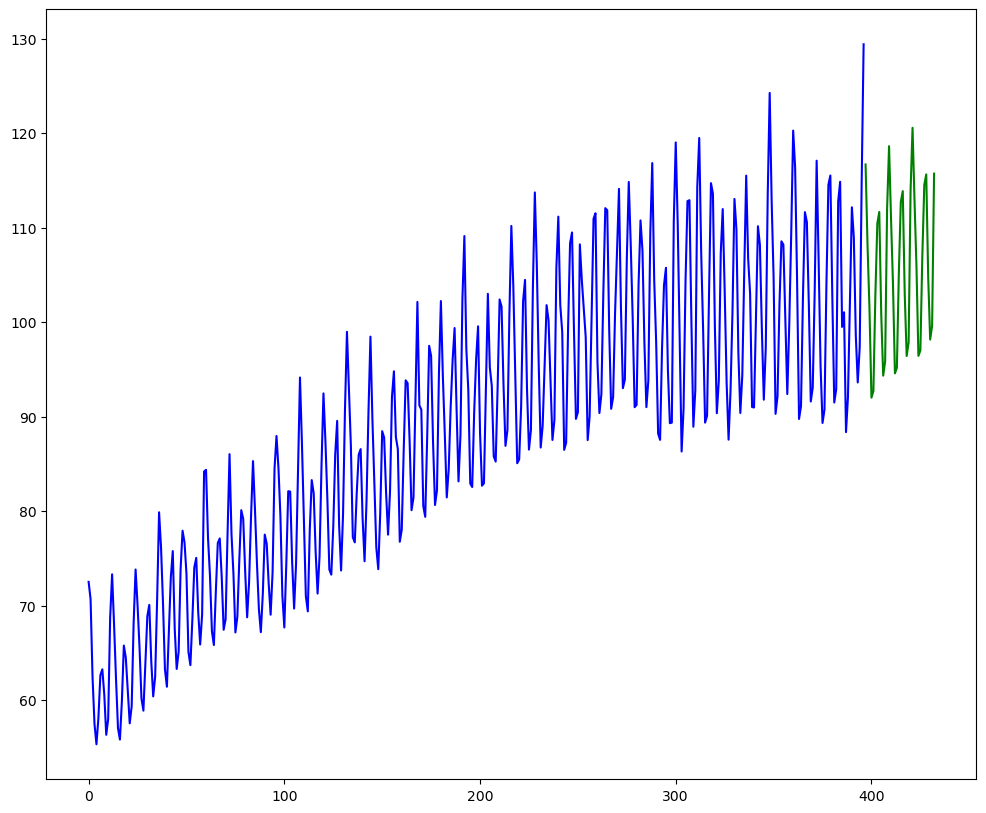

In [54]:

forecasts = model.predict(36) 
print(dataset['IPG2211A2N'].to_numpy())
print(dataset['IPG2211A2N'].to_numpy().reshape(-1))
x = np.arange(len(dataset['IPG2211A2N'].to_numpy().reshape(-1))+36)
plt.plot(x[:len(dataset['DATE'])], dataset['IPG2211A2N'].to_numpy().reshape(-1), c='blue')
plt.plot(x[len(dataset['DATE']):], forecasts, c='green')
plt.show()

Визуально, модель прогнозирует будующие значения правильно.

In [55]:
ps = range(0, 3)
d=1
qs = range(0, 1)
Ps = range(0, 3)
D=1
Qs = range(0, 3)

In [56]:
from itertools import product
import warnings
warnings.filterwarnings('ignore')

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

27

In [57]:
%%time
results = []
best_aic = float("inf")



for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(dataset['IPG2211A2N'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

CPU times: total: 1min 53s
Wall time: 14.3 s


Построим модель SARIMAX и подберем параметры. Построим прогноз.

In [39]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters          aic
26  (2, 0, 2, 2)  1811.649075
25  (2, 0, 2, 1)  1815.773319
23  (2, 0, 1, 2)  1825.456000
20  (2, 0, 0, 2)  1825.997137
19  (2, 0, 0, 1)  1826.073968


In [60]:
print(best_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(2, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -898.825
Date:                                 Sun, 16 Feb 2025   AIC                           1811.649
Time:                                         22:16:37   BIC                           1839.304
Sample:                                              0   HQIC                          1822.618
                                                 - 397                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2821      0.046     -6.179      0.000      -0.372      -0

In [58]:
#plt.subplot(211)
#best_model.resid[13:].plot()
#plt.ylabel(u'Residuals')
#plt.show()

#ax = plt.subplot(212)
#sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)


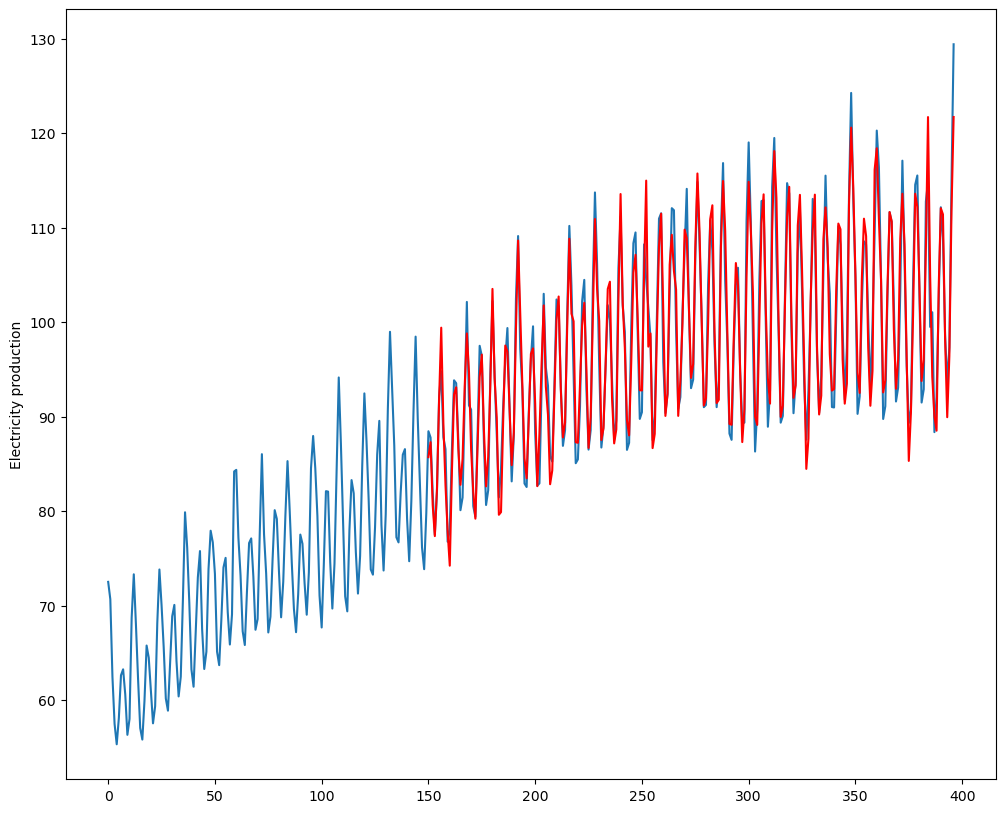

In [59]:
dataset['model1'] = best_model.fittedvalues
dataset['IPG2211A2N'].plot()
dataset['model1'][150:].plot(color='r')
plt.ylabel('Electricity production')
plt.show()

ВИзуально модель рабочая.


Выводы: Построили модель Авто-арима, Саримакс. 

Prophet не установился.

Также создали DOCKER контейнер c Tensorflow и юпитер.